In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
img = cv2.imread('D:\pythonworkplace\AI_CV\week2\Luffy.png')

In [5]:
class Median_filter(object):
    def __init__(self, img, kernel = (3, 3), padding_way = 'ZERO'):
        self.img = img
        self.kernel = kernel
        self.padding_way = padding_way
        # 检查padding way 的输入
        allowed = ('ZERO', 'REPLICA')
        self.padding_way = self.padding_way.upper()
        if self.padding_way not in allowed:
            raise ValueError('The `padding` value must be "ZERO" or "REPLICA", Received:', + str(self.padding_way))
        
        kernel_shape = self.kernel.shape
        if kernel_shape[0] % 2 == 0 or kernel_shape[1] % 2 == 0:
            raise AttributeError('Error Kernel Size! Must be ODD!!')
    
    def getMedianArray(self, img_chl):
        img_shape= img_chl.shape           # 获取图片数组的尺寸
        kernel_shape= self.kernel.shape
        pad_width = (kernel_shape[0] - 1) // 2   # 计算需要扩充的尺寸
        

        # 进行图片扩充
        if self.padding_way == 'REPLICA':   # 倒映扩充
            img_pad = np.lib.pad(img_chl, pad_width, mode = 'edge')
        if self.padding_way == 'ZERO':      # 补零扩充
            img_pad = np.lib.pad(img_chl, pad_width, mode = 'constant', constant_values = 0)

        img_blur = np.zeros_like(img_chl)
        window = np.zeros_like(self.kernel)
        for x in range(img_shape[1]):
            for y in range(img_shape[0]):
                window[:, :] = img_pad[y : y + pad_width * 2 + 1, x : x + pad_width * 2 + 1]
                img_blur[y, x] = np.sort(window.flatten())[window.size // 2]
        return img_blur
    
    def medianBlur(self):
        B, G, R = cv2.split(self.img)
        B_blur = self.getMedianArray(B)
        G_blur = self.getMedianArray(G)
        R_blur = self.getMedianArray(R)
        img_merge = cv2.merge((B_blur, G_blur, R_blur))
        return img_merge

In [6]:
kernel = np.zeros((3,3))    # 3*3卷积核
img_re = Median_filter(img, kernel, 'REPLICA')
img_ze = Median_filter(img, kernel, 'ZERO')
img_re_blur = img_re.medianBlur()
img_ze_blur = img_ze.medianBlur()
dst = cv2.medianBlur(img, 3)

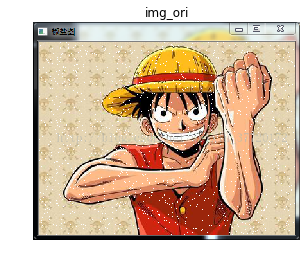

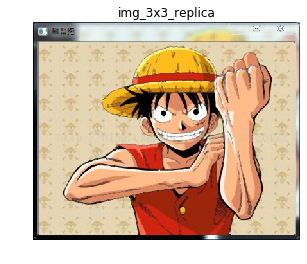

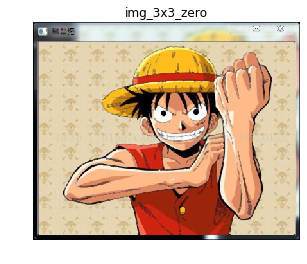

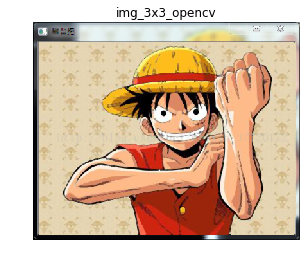

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title('img_ori')
plt.show()

img_re_blur = cv2.cvtColor(img_re_blur, cv2.COLOR_BGR2RGB)
plt.imshow(img_re_blur)
plt.axis('off')
plt.title('img_3x3_replica')
plt.show()

img_ze_blur = cv2.cvtColor(img_ze_blur, cv2.COLOR_BGR2RGB)
plt.imshow(img_ze_blur)
plt.axis('off')
plt.title('img_3x3_zero')
plt.show()

dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.axis('off')
plt.title('img_3x3_opencv')
plt.show()

In [8]:
kernel = np.zeros((5,5))    # 5*5卷积核
img_re = Median_filter(img, kernel, 'REPLICA')
img_ze = Median_filter(img, kernel, 'ZERO')
img_re_blur = img_re.medianBlur()
img_ze_blur = img_ze.medianBlur()
dst = cv2.medianBlur(img, 5)

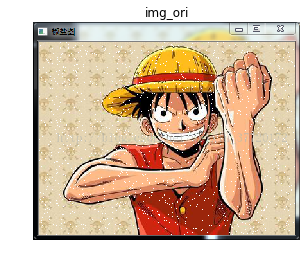

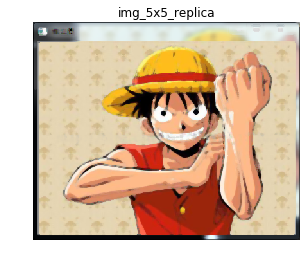

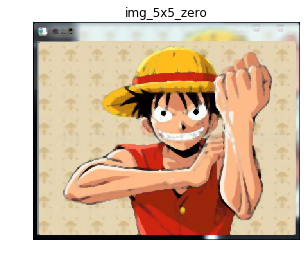

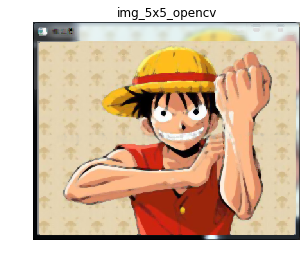

In [10]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title('img_ori')
plt.show()

img_re_blur = cv2.cvtColor(img_re_blur, cv2.COLOR_BGR2RGB)
plt.imshow(img_re_blur)
plt.axis('off')
plt.title('img_5x5_replica')
plt.show()

img_ze_blur = cv2.cvtColor(img_ze_blur, cv2.COLOR_BGR2RGB)
plt.imshow(img_ze_blur)
plt.axis('off')
plt.title('img_5x5_zero')
plt.show()

dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.axis('off')
plt.title('img_5x5_opencv')
plt.show()

In [11]:
kernel = np.zeros((7,7))    # 7*7卷积核
img_re = Median_filter(img, kernel, 'REPLICA')
img_ze = Median_filter(img, kernel, 'ZERO')
img_re_blur = img_re.medianBlur()
img_ze_blur = img_ze.medianBlur()
dst = cv2.medianBlur(img, 7)

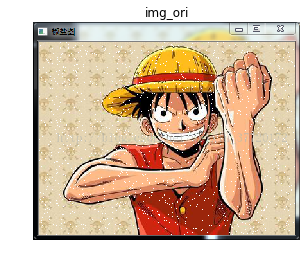

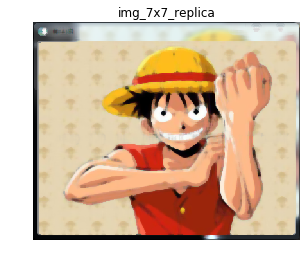

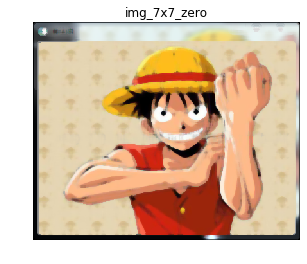

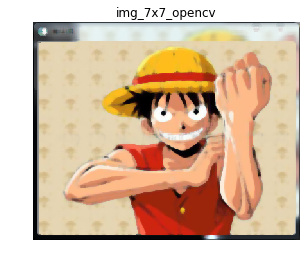

In [13]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title('img_ori')
plt.show()

img_re_blur = cv2.cvtColor(img_re_blur, cv2.COLOR_BGR2RGB)
plt.imshow(img_re_blur)
plt.axis('off')
plt.title('img_7x7_replica')
plt.show()

img_ze_blur = cv2.cvtColor(img_ze_blur, cv2.COLOR_BGR2RGB)
plt.imshow(img_ze_blur)
plt.axis('off')
plt.title('img_7x7_zero')
plt.show()

dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.axis('off')
plt.title('img_7x7_opencv')
plt.show()

# 总结

1. 补零扩充以及倒映扩充经过中值滤波得到的平滑效果差不多，都能够使得图像变得更加平滑
2. 卷积核窗口的大小影响平滑效果，窗口越大，平滑效果更明显